In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [11]:
def trend_enhanced_RSV(df, window=20, trend_window=50):
    """
    趋势增强RSV：在趋势方向强化信号，逆趋势弱化信号
    金融原理：趋势是朋友（The trend is your friend）
    """
    # 计算基础RSV
    # 计算滚动窗口内的最低价
    min_low = df['low'].rolling(window).min()
    
    # 计算滚动窗口内的最高价
    max_high = df['high'].rolling(window).max()
    
    # 计算分母（添加1e-12避免除零错误）
    denominator = max_high - min_low + 1e-12
    
    # 计算RSV因子
    rsv = (df['close'] - min_low) / denominator
    
    # 判断趋势方向（双移动平均线）
    short_ma = df['close'].rolling(window//2).mean()
    long_ma = df['close'].rolling(trend_window).mean()
    trend_strength = (short_ma - long_ma) / (df['close'].rolling(trend_window).std() + 1e-12)
    
    # 应用趋势增强
    bullish_mask = trend_strength > 0
    bearish_mask = trend_strength < 0
    
    # 在上升趋势中强化超买信号，弱化超卖信号
    enhanced = rsv.copy()
    enhanced[bullish_mask] = 0.5 + (rsv[bullish_mask] - 0.5) * 1.5
    enhanced[bearish_mask] = 0.5 + (rsv[bearish_mask] - 0.5) * 0.7
    
    return enhanced

# 测试因子表现


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.011153
   Rank_IC (Spearman): -0.027341
📊 信息比率:
   IR: 0.125213
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130919
   因子列: trend_enhanced_RSV
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


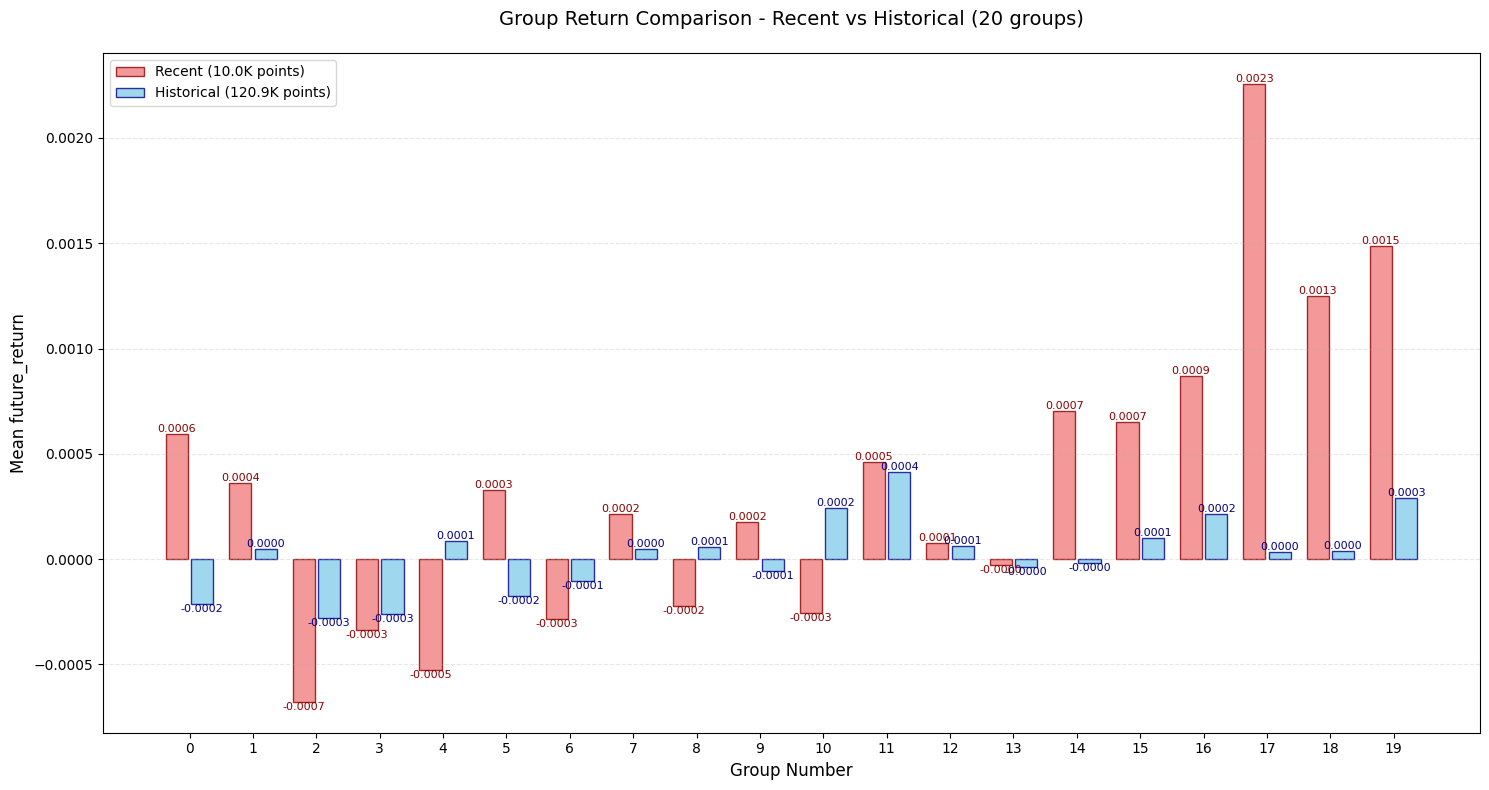

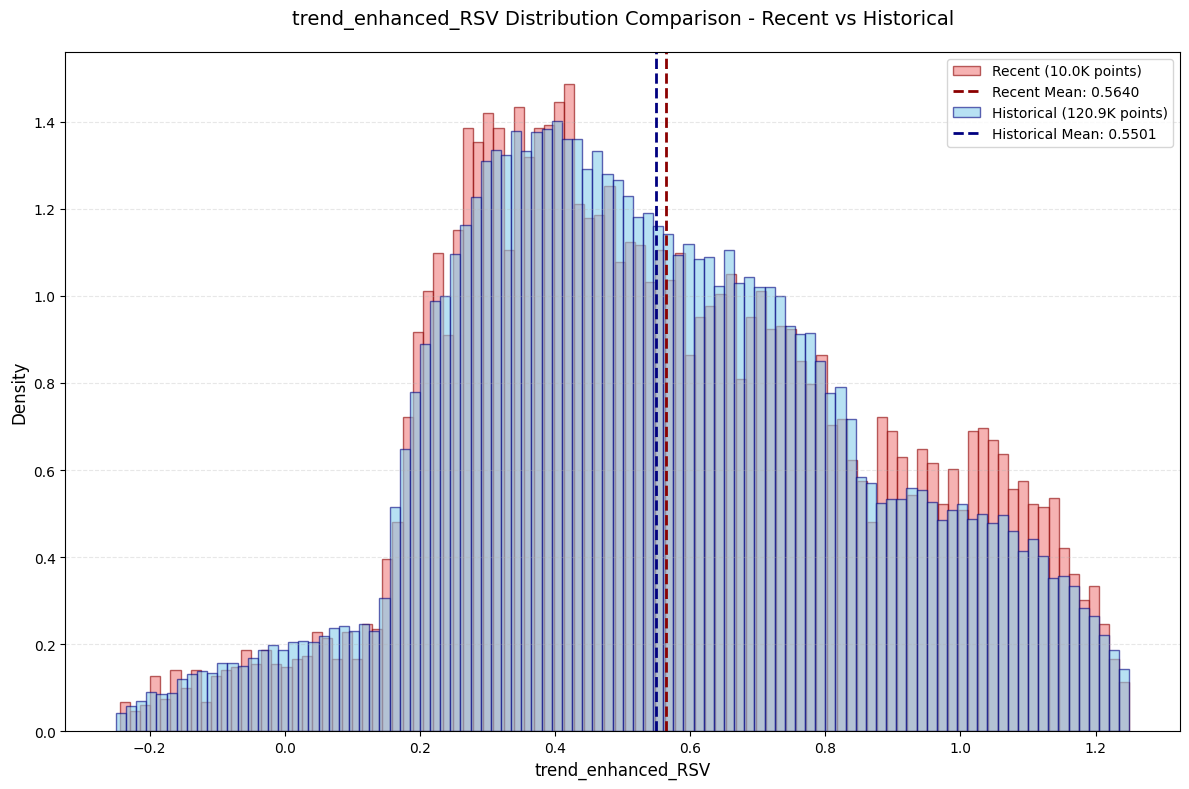

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [12]:
evaluator.set_factor(
    factor_func=trend_enhanced_RSV,
    factor_name='trend_enhanced_RSV'
)

result=evaluator.run_full_evaluation(run_stationarity_test=False)

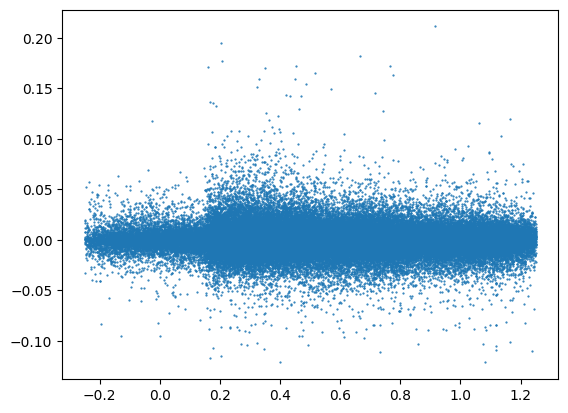

In [13]:
import matplotlib.pyplot as plt
plt.scatter(trend_enhanced_RSV(df),df['close'].pct_change(-10), s=0.3)

In [14]:
result['information_ratio']['group_correlations']

[0.011874987657634197,
 0.003516604398655974,
 -0.006302708020675903,
 0.004126195501957878,
 -0.00024015117010492683,
 0.004179024857085833,
 -0.007819707922185448,
 0.0012871208234512927,
 -0.006101278539754475,
 0.002668939001015473]

In [15]:
print(result)

{'correlation_analysis': {'IC': 0.011152923656553772, 'Rank_IC': -0.02734084762993806}, 'information_ratio': {'IR': 0.1252134886077317, 'group_correlations': [0.011874987657634197, 0.003516604398655974, -0.006302708020675903, 0.004126195501957878, -0.00024015117010492683, 0.004179024857085833, -0.007819707922185448, 0.0012871208234512927, -0.006101278539754475, 0.002668939001015473], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.2500   0.0869   -0.0455      -0.0001      0.0113   6546
1       0.0870   0.2044    0.1622       0.0001      0.0137   6546
2       0.2044   0.2547    0.2302      -0.0004      0.0132   6546
3       0.2547   0.2961    0.2759      -0.0002      0.0128   6546
4       0.2961   0.3337    0.3149       0.0000      0.0125   6546
5       0.3337   0.3704    0.3521      -0.0001      0.0124   6546
6       0.3705   0.4067    0.3887 